In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


file_path = 'CFD.xlsx'

df = pd.read_excel(file_path)

In [ ]:
df['rotating'] = df['rotating'].replace({'co': 0, 'counter': 1})
features = df.drop('torque', axis=1)
target = df['torque']

In [ ]:
sc = MinMaxScaler()
X = features
y = target
X_scale = sc.fit_transform(X)
X_scale

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.11111111, 0.        ],
       [0.        , 0.        , 0.22222222, 0.        ],
       ...,
       [1.        , 1.        , 1.        , 1.        ],
       [0.75      , 1.        , 0.33333333, 1.        ],
       [0.75      , 1.        , 0.33333333, 1.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.30, random_state = 42,stratify=df.rotating)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(100,500,100,),random_state = 42, max_iter=2000)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

Fitting 10 folds for each of 48 candidates, totalling 480 fits


({'activation': 'relu',
  'alpha': 0.01,
  'hidden_layer_sizes': (100, 100),
  'learning_rate_init': 0.001},
 -4.860480965410789e-05)

In [ ]:
mlp2 = MLPRegressor(hidden_layer_sizes = (100, 100), activation = 'relu', alpha = 0.01,learning_rate_init = 0.001,random_state=42,max_iter=1000)

# Fit the model
mlp2.fit(X_scale, y)

# Predict the target values
y_pred = mlp2.predict(X_scale)

# Calculate metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
mse,r2

(1.722663649055386e-05, -5.05273899823906)

In [ ]:
#y_pred = cross_val_predict(mlp, X_train, y_train, cv=5)
#mse = mean_squared_error(y_train, y_pred)
#r2 = r2_score(y_train, y_pred)
#mse,r2

(6.789826048385879e-05, -24.32677081371789)

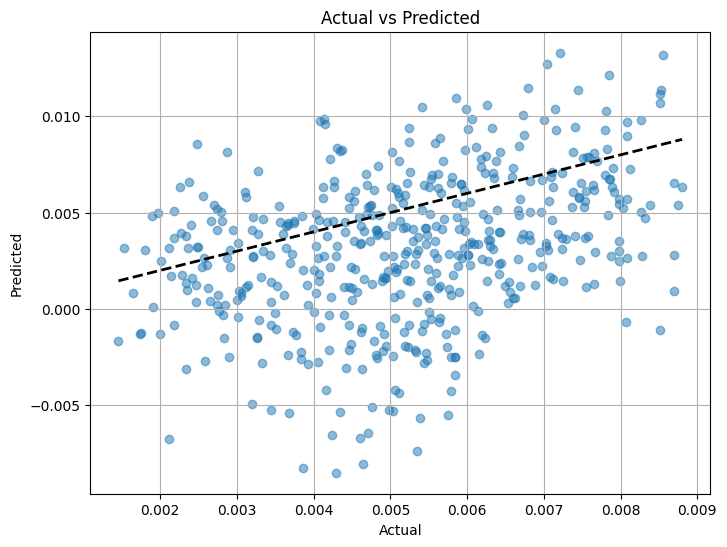

In [ ]:
 plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

In [ ]:
#mlp.fit(X_train,y_train)

MLPRegressor(hidden_layer_sizes=(100, 500, 100), max_iter=2000, random_state=42)

In [ ]:
#y_pred = mlp.predict(X_test)
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
#mse, r2

(6.148635289524767e-05, -18.25387178466924)